In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive






## **Importing required libraries**


In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# **Loading dataset**


In [3]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Split the dataset into trainin, validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=50)
print(dataset)

     Unnamed: 0  location  country  gender   age  vis_wuhan  from_wuhan  \
0             0       104        8       1  66.0          1           0   
1             1       101        8       0  56.0          0           1   
2             2       137        8       1  46.0          0           1   
3             3       116        8       0  60.0          1           0   
4             4       116        8       1  58.0          0           0   
..          ...       ...      ...     ...   ...        ...         ...   
858         858        48        3       2  24.0          0           0   
859         859         0        0       2  35.0          0           0   
860         860         3        1       1  49.4          0           0   
861         861        24        9       1  49.4          0           0   
862         862        15       27       1  70.0          0           0   

     symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  \
0          14     

# **Decision  Tree**

_______________DECISION TREE______________


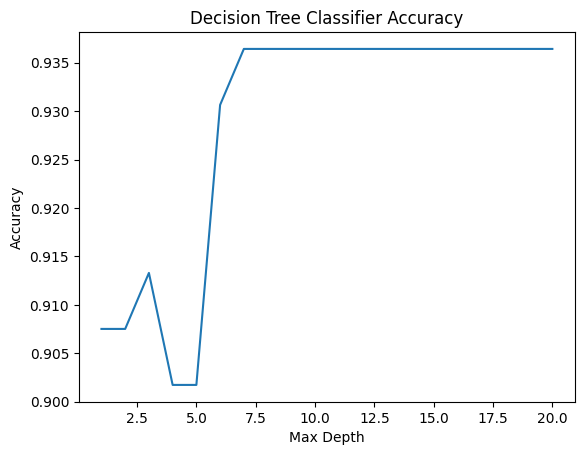

Best max_depth value: 7
Validation Accuracy:  0.9364161849710982
Evaluation Accuracy:  0.9826589595375722
Evaluation Precision: 0.9565217391304348
Evaluation Recall:    0.9166666666666666
Evaluation F1:        0.9361702127659574
ROC score:            0.9549776286353467


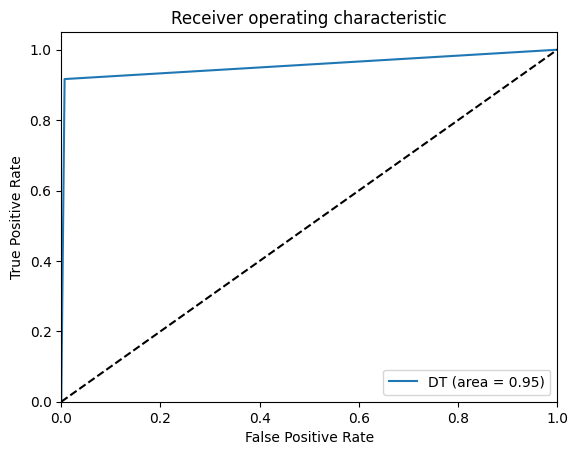

In [4]:
print("_______________DECISION TREE______________")

# Create arrays to store max_depth and accuracy values
max_depth_values = range(1, 21)
accuracy = []

# Train and validate the decision tree classifier for different values of max_depth
for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    y_val_pred = dt.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Plot max_depth versus accuracy
plt.plot(max_depth_values, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()
# Find the index of the best max_depth value
best_depth_idx = np.argmax(accuracy)
best_depth = max_depth_values[best_depth_idx]
best_accuracy = accuracy[best_depth_idx]

# Print the best max_depth value and corresponding accuracy
print(f"Best max_depth value: {best_depth}")


# Create the Decision Tree model
DT = DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='best')
# Train the Decision Tree model
DT.fit(X_train, y_train)
# Validate the Decision Tree model
D_val_pred = DT.predict(X_val)
DT_Val_Accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", DT_Val_Accuracy)
# Test the Decision Tree model
y_pred = DT.predict(X_test)
# Evaluate the Decision Tree model
DT_accuracy = accuracy_score(y_test, y_pred)
print("Evaluation Accuracy: ", DT_accuracy)
DT_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:", DT_precision)
DT_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ", DT_recall)
DT_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", DT_f1)
DT_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",DT_ROC_SCORE)


# Plot ROC curves for SVM classifier
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, y_pred)
DT_roc_auc = auc(DT_fpr, DT_tpr)
plt.plot(DT_fpr, DT_tpr, label='DT (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()







# **MLP (Multi-Layer Preceptron)**

___________________MLP__________________


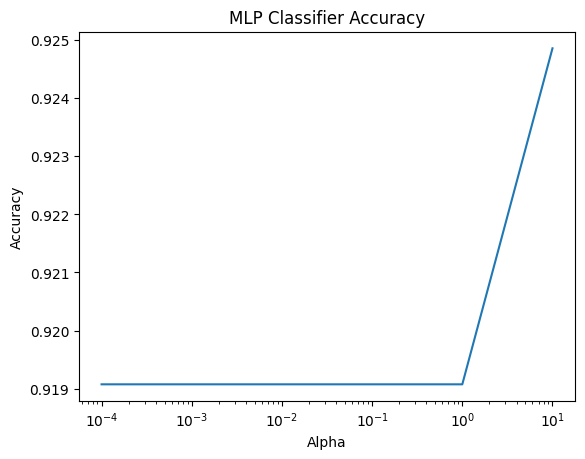

Best alpha value: 10
Validation Accuracy:  0.9364161849710982
Evaluation Accuracy:  0.953757225433526
Evaluation Precision: 0.8076923076923077
Evaluation Recall:    0.875
Evaluation F1:        0.8400000000000001
ROC score:            0.9207214765100671


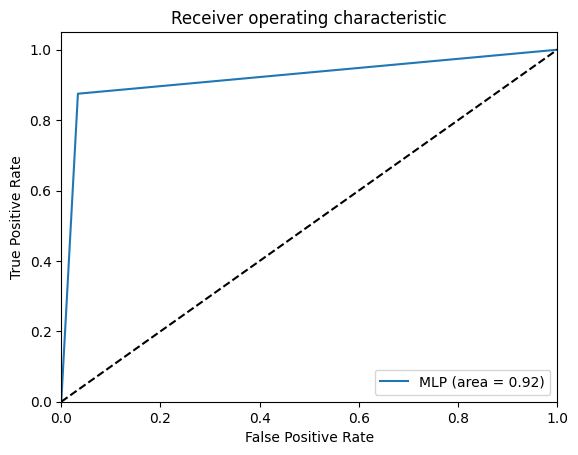

In [5]:
print("___________________MLP__________________")

# Create arrays to store alpha and accuracy values
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
accuracy = []

# Train and validate the MLP classifier for different values of alpha
for alpha in alpha_values:
    mlp = MLPClassifier(alpha=alpha, max_iter=10000, random_state=42)
    mlp.fit(X_train, y_train)
    y_val_pred = mlp.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Plot alpha versus accuracy
plt.plot(alpha_values, accuracy)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('MLP Classifier Accuracy')
plt.show()

# Find the index of the best alpha value
best_alpha_idx = np.argmax(accuracy)
best_alpha = alpha_values[best_alpha_idx]
best_accuracy = accuracy[best_alpha_idx]

# Print the best alpha value and corresponding accuracy
print(f"Best alpha value: {best_alpha}")



# Create the MLP model
MLP = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam',alpha=0.001, learning_rate='adaptive', learning_rate_init=0.001, max_iter=2000)
# Train the MLP model
MLP.fit(X_train, y_train)
# Validate the MLP Tree model
y_val_pred = MLP.predict(X_val)
MLP_Val_Accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", MLP_Val_Accuracy)
# Test the MLP model
y_pred = MLP.predict(X_test)
# Evaluate the MLP model
MLP_accuracy = accuracy_score(y_test, y_pred)
print("Evaluation Accuracy: ", MLP_accuracy)
MLP_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:", MLP_precision)
MLP_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ", MLP_recall)
MLP_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", MLP_f1)
MLP_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",MLP_ROC_SCORE)
# Plot ROC curves for SVM classifier
MLP_fpr, MLP_tpr, MLP_thresholds = roc_curve(y_test, y_pred)
MLP_roc_auc = auc(MLP_fpr, MLP_tpr)
plt.plot(MLP_fpr, MLP_tpr, label='MLP (area = %0.2f)' % MLP_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()





